# Лабораторная работа №1: Моделирование стандартных дискретных сигналов

Короткина Елизавета, Магнитов Сергей, Сарычева Александра.

Вариант 6

Группа 0381

## Цель работы


Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения




### Определение сигналов

Аналоговый сигнал - сигнал, который непрерывен во времени и может принимать значения из непрерывного диапазона.

Дискретный сигнал - сигнал, который оперделен на дискретном наборе значений. Поэтому он является не непрерывной линией, а набором значений.

Детерминированный сигнал - сигнал, который полностью известен, т.е. его
значение в любой момент времени можно определить точно.

### Виды детерминированных дискретных сигналов

Единичный цифровой импульс:

$\delta_d (k) = \begin{equation*}
\begin{cases}
   1, k = 0\\
   0, k \neq 0
 \end{cases}
\end{equation*} \quad k=...,-2,-1,0,1,2, ...$

Дискретный единичный скачок:

$\sigma_d (k) = \begin{equation*}
\begin{cases}
   1, k \geq 0\\
   0, k < 0
 \end{cases}
\end{equation*} \quad k=...,-2,-1,0,1,2, ...$

Дискретная экспоненциальная функция:

$s_1(k) = \begin{equation*}
\begin{cases}
   0, k < 0\\
   a^k, k \geq 0
 \end{cases}
\end{equation*} \quad k=...,-2,-1,0,1,2, ...$

Дискретный комплексный гармонический сигнал:

$s_2(k)=Cexp(j\hat{ω}_0k)$

Дискретная затухающая синусоида:

$s(k)=a^kcos(k\omega+\varphi)$

## Постановка задачи



1. Смоделировать единичный цифровой импульс $\delta_d (k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N-1)T]$ и дискретного нормированного времени $n \in [0, N-1]$. Пояснить:

$\qquad$A. взаимосвязь между дискретным и дискретным нормированным временем;

$\qquad$B. различие между единичным цифровым импульсом и дельта-функцией.

2. Смоделировать дискретный единичный скачок $\sigma_d (k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N-1)T]$ и дискретного нормированного времени $n \in [0, N-1]$. Пояснить:

$\qquad$A. соответствие между дискретным и аналоговым единичными скачками;

$\qquad$B. чему равна частота дискретизации дискретного единичного скачка.

3. Смоделировать дискретную экспоненциальную функцию $s_1 (k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N-1)T]$ и дискретного нормированного времени $n \in [0, N-1]$. Пояснить соответствие между дискретной и аналоговой экспонентами.


4. Смоделировать дискретный комплексный гармонический сигнал $s_2 (k) = C exp(j \hat\omega_0 k)$ с выводом графиков вещественной и мнимой частей на интервале времени $n \in [0, N-1]$. Записать данный сигнал в виде комбинации двух вещественных последовательностей.


5. Вывести графики последовательностей $\delta_d (k), \sigma_d (k)$ и $s_1 (k)$, задержанных на m отсчетов, на интервале времени $n \in [0, N-1]$. Записать формулы задержанных последовательностей.


6. Сделать выводы.

## Выполнение работы




###0. Инициализация данных.

Индивидуальный вариант.

|Переменная||Назначение||Формула для вычислений||Идентификатор|
|-||-||-||-|
|$N_{бр}$||Номер бригады||$N_{бр}$||$Nb=6$|
|$N$||Длина последовательности||$N=30+N_{бр}mod\space5$||$N=31$|
|$T$||Период дискретизации||$T=0.0005(1$$+N_{бр}mod\space3)$||$T=0.0005$|
|$a$||Основание экспоненты||$a = (-1)^{N_{бр}}$$(0.8+0.005$$(N_{бр}mod\space20$$))$||$a=0.83$|
|$C$||Амплитуда гармонического сигнала||$C = 1+N_{бр}mod\space5$||$C=2$|
|$\hat\omega_0(рад)$||Частота гармонического сигнала||$\hat\omega_0 = \frac{\pi}{6+N_{бр}mod\space5}$||$\hat\omega_0=0.44879$|
|$m$||Задержка||$m=5+N_{бр}mod\space5$||$m=6$|

Загрузка библиотек.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

Инициализация начальных данных.

In [2]:
Nb = 6
N = 30 + Nb % 5
T = 0.0005 * (1 + Nb % 3)
a = (-1)**Nb * (0.8 + 0.005 * (Nb % 20))
C = 1 + Nb % 5
w0 = math.pi / (6 + Nb % 5)
m = 5 + Nb % 5
print('Nb = %d, N = %d, T = %.4f, a = %.2f, C = %d, w0 = %f, m = %d.' % (Nb, N, T, a, C, w0, m))

Nb = 6, N = 31, T = 0.0005, a = 0.83, C = 2, w0 = 0.448799, m = 6.


Инициализация дискретного времени и нормированного дискретного времени.

In [3]:
discrete_time_points = np.linspace(0, (N - 1) * T, N)
norm_discrete_time_points = np.linspace(0, N - 1, N)

### 1. Моделирование единичного цифрового импульс $\delta_d (k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N-1)T]$ и дискретного нормированного времени $n \in [0, N-1]$.

In [4]:
def single_digital_pulse(time_points, moment):
    y = np.zeros(len(time_points))
    y[moment] = 1
    return y

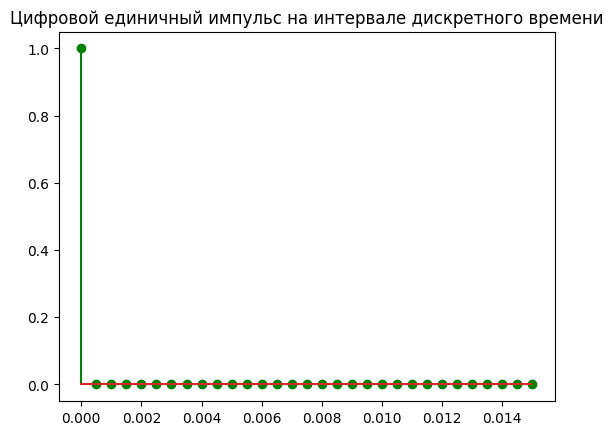

In [5]:
plt.stem(discrete_time_points, single_digital_pulse(discrete_time_points, 0), linefmt='green')
plt.title("Цифровой единичный импульс на интервале дискретного времени")
plt.show()

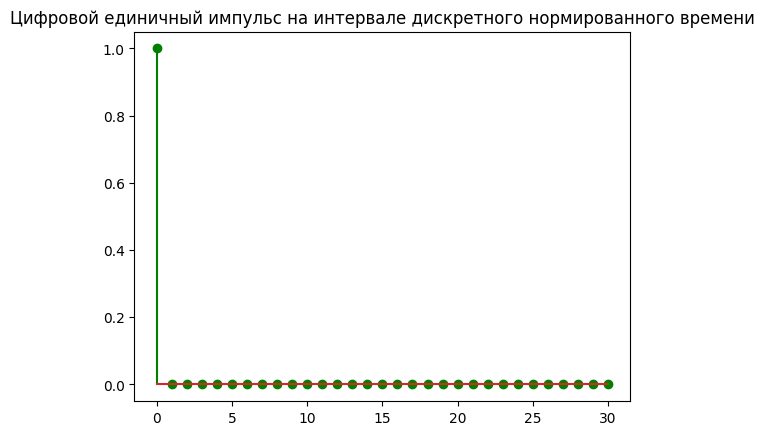

In [6]:
plt.stem(norm_discrete_time_points, single_digital_pulse(norm_discrete_time_points, 0), linefmt='green')
plt.title("Цифровой единичный импульс на интервале дискретного нормированного времени")
plt.show()

Пояснение:

A. Взаимосвязь между дискретным и дискретным нормированным временем заключается в том, что дискретное нормированное время n – это дискретное время nT, когда период дискретизации равен T=1.

B. Различие между единичным цифровым импульсом и дельта-функцией состоит в том, что амплитуда дельта-функции равна бесконечности, а амплитуда у единичного цифрового импульса - единице.



###2. Моделирование дискретного единичного скачка $\sigma_d (k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N-1)T]$ и дискретного нормированного времени $n \in [0, N-1]$:

In [7]:
def heaviside_function(time_points, moment):
  y = np.zeros(len(time_points))
  for i in range(moment, len(time_points)):
    y[i] = 1
  return y

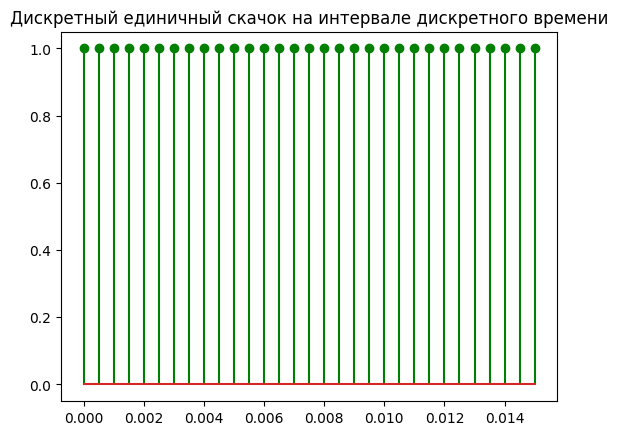

In [8]:
plt.stem(discrete_time_points, heaviside_function(discrete_time_points, 0), linefmt='green')
plt.title("Дискретный единичный скачок на интервале дискретного времени")
plt.show()

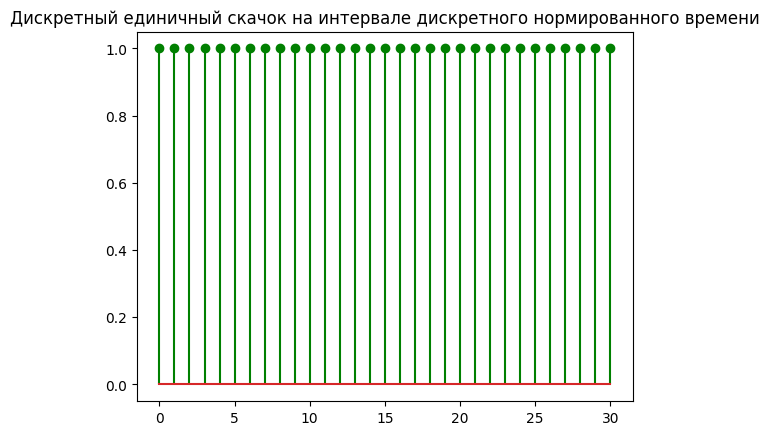

In [9]:
plt.stem(norm_discrete_time_points, heaviside_function(norm_discrete_time_points, 0), linefmt='green')
plt.title("Дискретный единичный скачок на интервале дискретного нормированного времени")
plt.show()

Пояснение:

A. Соответствие между дискретным и аналоговым единичными скачками состоит в следующем: в аналоговой версии единичного скачка в начальный момент времени совершения скачка функция равна 0.5 (при распространенном определении).Однако можно также задать, чтобы в нулевой момент функция выдавала значения 0 или 1. Если выбрать последний вариант, то при устремлении частоты дискретезации к бесконечно малому значению аналоговый и дискретный скачки совпадут.

B. Частота дискретизации дискретного единичного скачка равна  $f_{д}=\frac{1}{T}=\frac{1}{0.0005}=2000$.




###3. Моделирование дискретной экспоненциальной функции $s_1 (k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N-1)T]$ и дискретного нормированного времени $n \in [0, N-1]$.

In [10]:
def discrete_exponential_function(time_points, moment):
    y = np.zeros(len(time_points))
    for i in range(moment, len(time_points)):
      y[i] = a**(time_points[i] - moment)
    return y

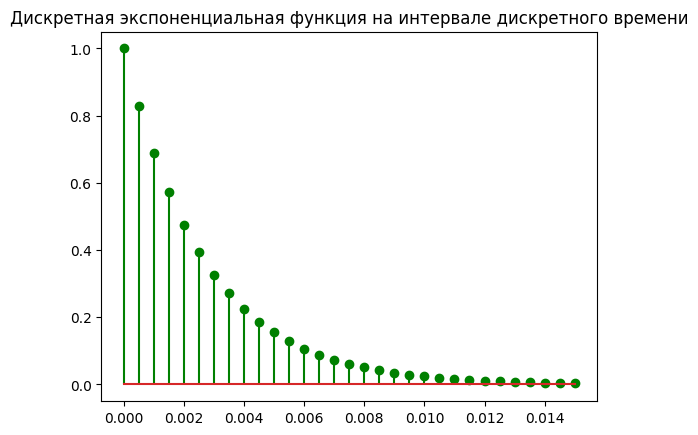

In [19]:
plt.stem(discrete_time_points, discrete_exponential_function(norm_discrete_time_points, 0), linefmt='green')
plt.title("Дискретная экспоненциальная функция на интервале дискретного времени")
plt.show()

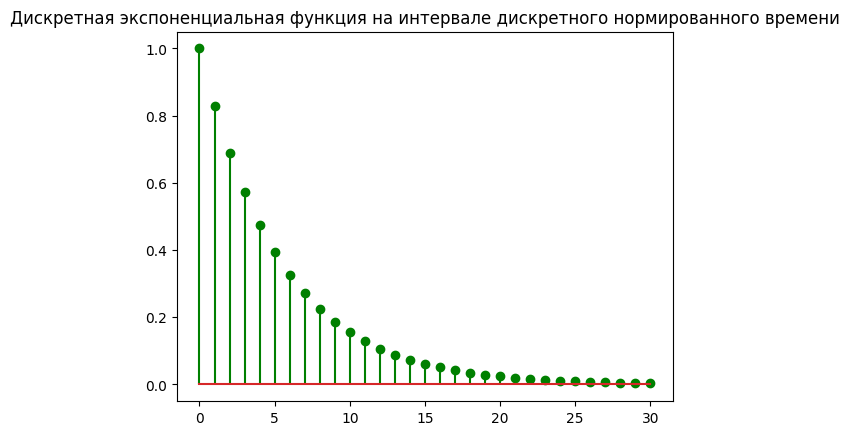

In [20]:
plt.stem(norm_discrete_time_points, discrete_exponential_function(norm_discrete_time_points, 0), linefmt='green')
plt.title("Дискретная экспоненциальная функция на интервале дискретного нормированного времени")
plt.show()

Соответствие между дискретной и аналоговой экспонентами состоит в следующем: дискретная экспоненциальная функция получается с помощью дискретизации аналоговой экспоненты. Однако их различие заключается в следующем: при $k<0$ аналоговая функция имеет значения $a^k$, а дискретная версия будет принимать 0 в этой области.




###4. Моделирование дискретного комплексного гармонического сигнала $s_2 (k) = C exp(j \hat\omega_0 k)$ с выводом графиков вещественной и мнимой частей на интервале времени $n \in [0, N-1]$.

In [13]:
def complex_signal(time_points, moment, part='real'):
  y = np.zeros(len(time_points))
  for i in range(moment, len(time_points)):
    y = C * np.exp(1j * w0 * time_points)
  return y.real if part == 'real' else y.imag

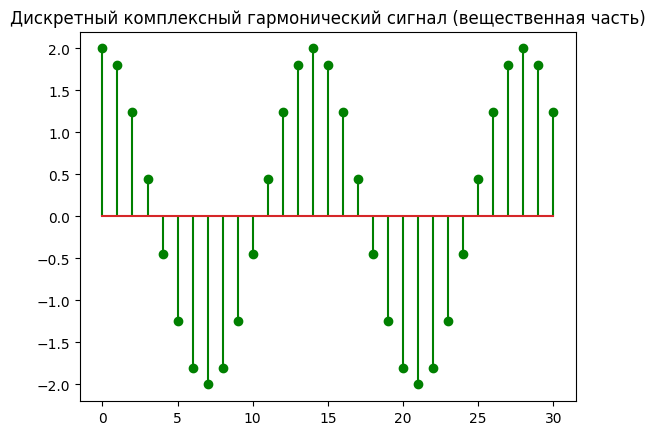

In [14]:
plt.stem(norm_discrete_time_points, complex_signal(norm_discrete_time_points, 0), linefmt='green')
plt.title("Дискретный комплексный гармонический сигнал (вещественная часть)")
plt.show()

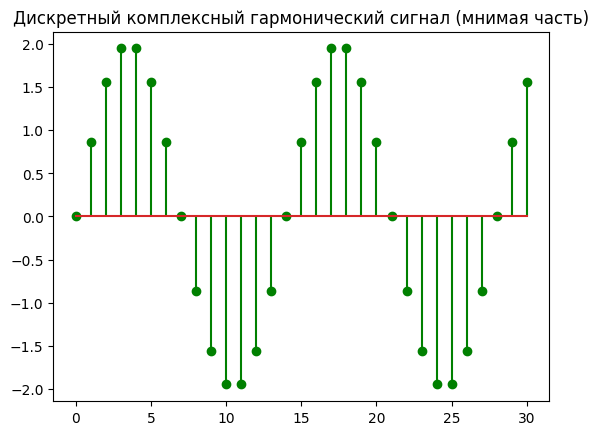

In [15]:
plt.stem(norm_discrete_time_points, complex_signal(norm_discrete_time_points, 0, "image"), linefmt='green')
plt.title("Дискретный комплексный гармонический сигнал (мнимая часть)")
plt.show()

Дискретный комплексный гармонический сигнал можно расписать по формуле Эйлера следующим образом:

$s_2(k)=C\exp(j\hatω_0k) = C(cos(\hatω_0k) + jsin(\hatω_0k))$.

Отсюда видно, что вещественная часть сигнала описывает дискретную версию косинуса, а мнимая - дискретную версию синуса.



###5. Графическое представление последовательностей $\delta_d (k), \sigma_d (k)$ и $s_1 (k)$, задержанных на m отсчетов, на интервале времени $n \in [0, N-1]$.

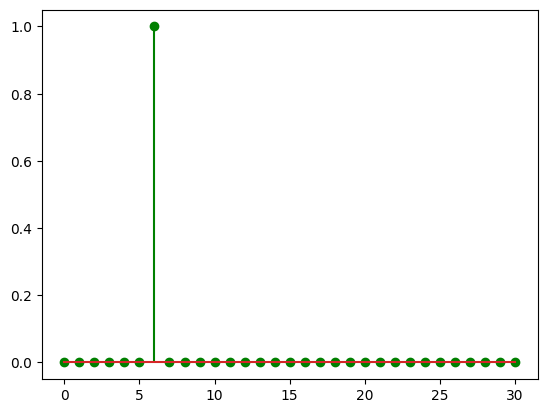

In [16]:
plt.stem(norm_discrete_time_points, single_digital_pulse(norm_discrete_time_points, m), linefmt='green')
plt.show()

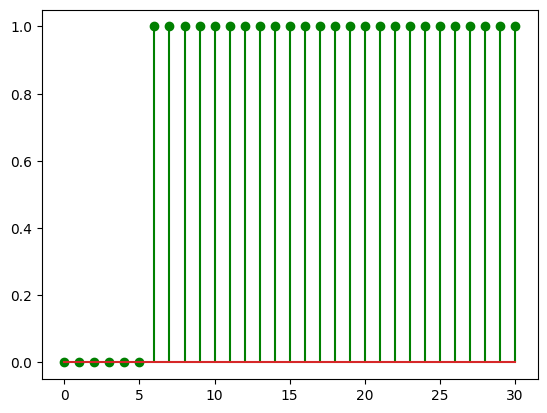

In [17]:
plt.stem(norm_discrete_time_points, heaviside_function(norm_discrete_time_points, m), linefmt='green')
plt.show()

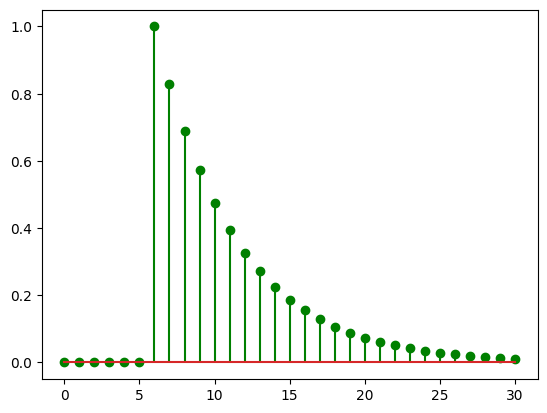

In [18]:
plt.stem(norm_discrete_time_points, discrete_exponential_function(norm_discrete_time_points, m), linefmt='green')
plt.show()

Формулы задержанных последовательностей:

1. Формула единичного импульса, задержанного на m отсчётов: $\delta_d (k) = \begin{equation*}
\begin{cases}
   1, k = m\\
   0, k \neq m
 \end{cases}
\end{equation*}$

2. Формула единичного скачка, задержанного на m отсчётов: $\sigma_d (k) = \begin{equation*}
\begin{cases}
   1, k \geq m\\
   0, k < m
 \end{cases}
\end{equation*}$

3. Формула дискретной экспоненциальной функции, задержанной на m отсчётов: $s_1 (k) = \begin{equation*}
\begin{cases}
   a^{k-m}, k \geq m\\
   0, k < m
 \end{cases}
\end{equation*}$



## Выводы



Были изучены математические описания дискретных сигналов. Для этого были исследованы: цифровой единичный импульс, цифровой единичный скачок, дискретная экспонента и дискретный комплексный гармонический сигнал. Сигналы были визуализированы и рассмотрены как с использованием дискретного времени, так и с применением дискретного нормированного времени. Было закреплено понимание дискретных сигналов. А также были исследованы задержанные последовательности, их формулы и обнаружена закономерность, как сдвиг влияет на графическое изображение.